# w2-project_pandas | Data Cleaning 

## Import libraries 

In [1063]:
%pip install ipython
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1064]:
#import main libraries 

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import pylab as plt  
import seaborn as sns

%matplotlib inline

## Import data base 

In [1065]:
linksharks = '/Users/criscarneiro/desktop/ironhack/7_DataProjects/1_w2_sharks/attacks.csv'

data = pd.read_csv(linksharks, encoding='latin1')

## Before continuing, some good practices 

In [1066]:
# I will create a copy of the original database 

data_original = data.copy()
data_original.shape

(25723, 24)

In [1067]:
# I will clean the names of columns 

data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [1068]:
data.columns = [c.lower().replace(' ', '_') for c in data.columns]

data.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

In [1069]:
# I will look for duplicates

data.duplicated().any() 

True

In [1070]:
# In fact, most of the table is composed of duplicated numbers. Removing them would leave us with 6k values, which is greater than 2.5k

data.drop_duplicates().shape

(6312, 24)

In [1071]:
# Indeed, there are a number of duplicated entries

#data[data.duplicated()].head()

In [1072]:
# I will drop duplicates 

data.drop_duplicates(inplace=True)

In [1073]:
# We maitain our original shape 

print(data.shape)
print(data_original.shape)

(6312, 24)
(25723, 24)


## Exploratory Analysis 

In [1074]:
#this is the structure of my data 

data.head(10)

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y/n),time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN


In [1075]:
#the database as it stands has 24 columns, 6.312 entries (i.e, shark attacks)

data.shape

(6312, 24)

In [1076]:
#here we can see again the number of columns and entries 
#we see that most columns are non-numerical 
#we anticipate there are a lot of null values - we will work on cleaning some of them!

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6312 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             6310 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex_                    5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal_(y/n)             5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species_                3464 non-null   obje

In [1077]:
# it seems we have two unnamed columns. I will check what they are about. 

In [1078]:
#unnamed:_22 has a single non-null value 

data['unnamed:_22'].unique()

array([nan, 'stopped here'], dtype=object)

In [1079]:
#unnamed:_23 has two non-null values

data['unnamed:_23'].unique()

array([nan, 'Teramo', 'change filename'], dtype=object)

In [1080]:
#for now, I will rename them and deal with them later if required based on the objective of analysis 

data = data.rename(columns={'unnamed:_22': 'check1','unnamed:_23': 'check2' })

In [1081]:
data.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'check1', 'check2'],
      dtype='object')

In [1082]:
#for now, not quite usefu since most variables are categorical 

data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_number,6310,6287,0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,6302,5433,1957,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,6300.0,NaN,NaN,NaN,1927.272381,281.116308,0.0,1942.0,1977.0,2005.0,2018.0
type,6298,8,Unprovoked,4595,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,6252,212,USA,2229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area,5847,825,Florida,1037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,5762,4108,"New Smyrna Beach, Volusia County",163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
activity,5758,1532,Surfing,971,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,6092,5230,male,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex_,5737,6,M,5094,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Setting an objective 

- While the primary purpose of this exercise is 'Data Cleaning', **I will define a 'Data Analysis' objetive**. This will help guide the cleaning process by focusing on the most relevant variables and avoid 'boiling the ocean'.

- In this exercise, I will try to **understand the 'fatality' of the shark attacks**. In other words, I will understand if it is correlated with a sub-list of categorical variables (i.e., location, activity, sex, age, time of attack)

- Thefore, **I will prioritize those columns in my cleaning process** 

In [1083]:
data.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'check1', 'check2'],
      dtype='object')

In [1084]:
#as a starting point, I will prioritize those columns for the analysis. This could evolve depending on the quality of the data

columns_focus = ['type','country','activity','sex_','age','fatal_(y/n)','time','species_']

In [1085]:
data[columns_focus].head()

,type,country,activity,sex_,age,fatal_(y/n),time,species_
0,Boating,USA,Paddling,F,57,N,18h00,White shark
1,Unprovoked,USA,Standing,F,11,N,14h00 -15h00,NaN
2,Invalid,USA,Surfing,M,48,N,07h45,NaN
3,Unprovoked,AUSTRALIA,Surfing,M,NaN,N,NaN,2 m shark
4,Provoked,MEXICO,Free diving,M,NaN,N,NaN,"Tiger shark, 3m"


## Looking for null values

In [1086]:
## In absolute terms 

nan_cols = data.isna().sum()
nan_cols

case_number                  2
date                        10
year                        12
type                        14
country                     60
area                       465
location                   550
activity                   554
name                       220
sex_                       575
age                       2841
injury                      38
fatal_(y/n)                549
time                      3364
species_                  2848
investigator_or_source      27
pdf                         10
href_formula                11
href                        10
case_number.1               10
case_number.2               10
original_order               3
check1                    6311
check2                    6310
dtype: int64

In [1087]:
# In relative terms

nan_cols = data.isna().mean() * 100
nan_cols[nan_cols>0]

case_number                0.031686
date                       0.158428
year                       0.190114
type                       0.221800
country                    0.950570
area                       7.366920
location                   8.713561
activity                   8.776933
name                       3.485425
sex_                       9.109632
age                       45.009506
injury                     0.602028
fatal_(y/n)                8.697719
time                      53.295311
species_                  45.120406
investigator_or_source     0.427757
pdf                        0.158428
href_formula               0.174271
href                       0.158428
case_number.1              0.158428
case_number.2              0.158428
original_order             0.047529
check1                    99.984157
check2                    99.968314
dtype: float64

<Axes: >

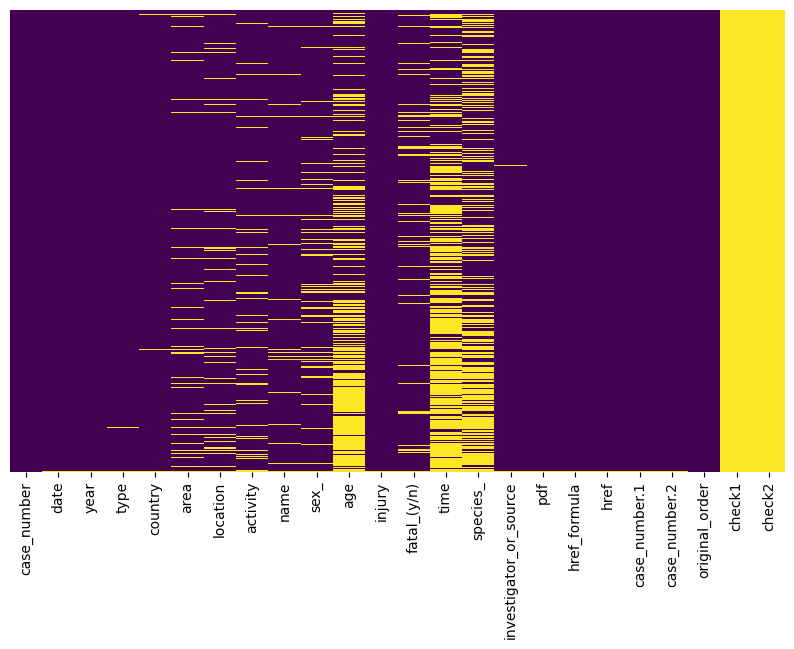

In [1088]:
# We can visualize it

plt.figure(figsize=(10, 6))  # 100X60  pixeles

sns.heatmap(data.isna(),yticklabels=False,cmap='viridis',cbar=False)

<Axes: >

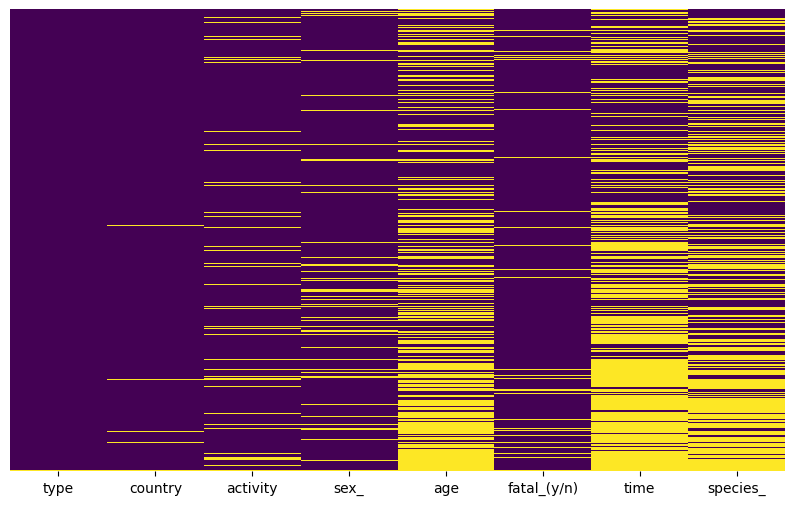

In [1089]:
# Here we look at the same chart, but zooming into our columns of focus 

plt.figure(figsize=(10, 6))  # 100X60  pixeles

sns.heatmap(data[columns_focus].isna(),yticklabels=False,cmap='viridis',cbar=False)

## Unknown Colums 

In [1090]:
# I will quickly check if the unknown columns could have relevant info (based on what we've seen above, they might be comment on the data set )

In [1091]:
# I will zoom into column check1, where we have the unique value
# If it were a note, it coud be refering to the original_order column.  

data[data.check1=='stopped here']

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y/n),time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,check1,check2
1478,2006.05.27,27-May-2006,2006.0,Unprovoked,USA,Hawaii,"North Shore, O'ahu",Surfing,Bret Desmond,M,31,"No injury, shark bumped surfboard",N,16h00,NaN,R. Collier,2006.05.27-Desmond.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.05.27,2006.05.27,4825.0,stopped here,NaN


In [1092]:
#this is the value index 

check1_value_index = data[data.check1=='stopped here'].index
check1_value_index

Index([1478], dtype='int64')

In [1093]:
#let me look around it 
#it says 'stopped here', can I identify anything that has stopped?
#for now, does not seem to be relevant, so I will ignore 

data[1477:1480]

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y/n),time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,check1,check2
1477,2006.05.28,28-May-2006,2006.0,Provoked,USA,Hawaii,French Frigate Shoals,Tagging sharks,"25' rigid-hulled inflatable boat, HI-2",NaN,NaN,"No injury to occupants, boat damaged by hooked...",N,Afternoon,"Tiger shark, 15' female","Honolulu Advertiser, 5/29/2006",2006.05.28-HI-2.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.05.28,2006.05.28,4826.0,NaN,NaN
1478,2006.05.27,27-May-2006,2006.0,Unprovoked,USA,Hawaii,"North Shore, O'ahu",Surfing,Bret Desmond,M,31,"No injury, shark bumped surfboard",N,16h00,NaN,R. Collier,2006.05.27-Desmond.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.05.27,2006.05.27,4825.0,stopped here,NaN
1479,2006.05.24,24-May-2006,2006.0,Provoked,USA,Hawaii,Lanai,Spearfishing,Andres Balmacda,M,15,Knee bitten after diver poked shark PROVOKED I...,N,16h30,"Grey reef shark, 5' to 8'","Maui News, 5/26/2006",2006.05.24-Balmacda.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.05.24,2006.05.24,4824.0,NaN,NaN


In [1094]:
# I will zoom into column check2, where we have the unique values
#'Teramo', 'change filename'

#for now, does not seem to be relevant, so I will ignore 

data[(data['check2'] == 'Teramo') | (data['check2'] == 'change filename')]


,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y/n),time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,check1,check2
4415,1952.03.30,30-Mar-1952,1952.0,Unprovoked,NETHERLANDS ANTILLES,Curacao,NaN,Went to aid of child being menaced by the shark,A.J. Eggink,M,NaN,"Buttock bitten, tissue removed",N,NaN,"Bull shark, 2.7 m [9'] was captured & dragged ...","J. Randall, p.352 in Sharks & Survival; H.D. B...",1952.03.30-Eggink.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.03.30,1952.03.30,1888.0,NaN,Teramo
5840,1878.09.14.R,Reported 14-Sep-1878,1878.0,Provoked,USA,Connecticut,"Branford, New Haven County",Fishing,Captain Pattison,M,NaN,Leg bitten by netted shark PROVOKED INCIDENT,N,NaN,NaN,"St. Joseph Herald, 9/14/1878",1878.09.14.R-Pattison.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.09.14.R,1878.09.14.R,463.0,NaN,change filename


## The issue with Attacks IDs: columns 'case_number', 'case_number.1', 'case_number.2', original_order 

- It seems there are different columns to represent the entry key for each shark attack. 
- case_number', 'case_number.1', 'case_number.2' seem to have similar values, but for not we are now sure. Also, they are clearly quite 'dirty' and would require a lot of work to be cleaned 
- 'original_order' seems to be a sequential list of values which could also be used to identify the attacks 

- Since this will not be relevant to the study at hand, I will disregard it for now

## Column fatal_(y/n)

In [1095]:
#since we are trying to explain this variable, let us look into it and clean it. 
#although we'd expect Y/N, we see there are different values and therefore we must clean them 

data['fatal_(y/n)'].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [1096]:
#lets look into there frequency 

data['fatal_(y/n)'].value_counts()

fatal_(y/n)
N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: count, dtype: int64

In [1097]:
#if the value is null or unkown, it does not serve our purpose. 
#also, 2017 is clearly not applicable here. 
#M could be a typo for N, but since I can not be sure I will remove it 

In [1098]:
#where are my NAs? 

bad_index_fatal = data['fatal_(y/n)'][data['fatal_(y/n)'].isna()].index
print(bad_index_fatal[:15])

Index([27, 76, 79, 84, 98, 107, 115, 124, 125, 145, 151, 153, 159, 187, 189], dtype='int64')


In [1099]:
#I will drop them

data.drop(bad_index_fatal, axis=0, inplace=True)

In [1100]:
#I am down 549 values, which is consistent with the absolute count we had done 

print(data.shape)
print(data_original.shape)

(5763, 24)
(25723, 24)


In [1101]:
#I will remove ['UNKNOWN', 'M', '2017']

bad_index_fatal = data[data['fatal_(y/n)'].isin(['UNKNOWN', 'M', 2017, '2017'])].index
print(bad_index_fatal)

Index([ 285,  624,  786, 1270, 2250, 2260, 2267, 2295, 2307, 2323, 2328, 2388,
       2404, 2409, 2648, 2650, 2661, 2806, 2882, 2900, 2943, 2996, 2998, 3006,
       3038, 3041, 3298, 3396, 3411, 3429, 3434, 3507, 3545, 3552, 3712, 3774,
       3794, 3838, 3841, 4060, 4208, 4256, 4269, 4310, 4323, 4517, 4689, 4786,
       4787, 4976, 4998, 5029, 5159, 5270, 5347, 5409, 5555, 5615, 5653, 5656,
       5674, 5708, 5709, 5998, 6081, 6153, 6165, 6166, 6167, 6169, 6171, 6172,
       6277],
      dtype='int64')


In [1102]:
#quick check 
data[data['fatal_(y/n)'].isin(['UNKNOWN', 'M', 2017, '2017'])] 

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y/n),time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,check1,check2
285,2016.04.18.b,18-Apr-2016,2016.0,Provoked,FRENCH POLYNESIA,Tuamotos,Makemo Atoll,Spearfishing,Hoata Iotua,M,22,Laceration to knee by speared shark PROVOKED I...,M,Morning,"Grey reef shark, 2 m","TNTV News, 4/19/2016",2016.04.18.b-Iotua.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.04.18.b,2016.04.18.b,6018.0,NaN,NaN
624,2013.09.08,08-Sep-2013,2013.0,Unprovoked,USA,South Carolina,"St. Helena Island, Beaufort County",NaN,female,F,NaN,No details,UNKNOWN,NaN,NaN,"WIS-TV, 9/9/2013",2013.09.08-St-Helena.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.09.08,2013.09.08,5679.0,NaN,NaN
786,2012.06.10,10-Jun-2012,2012.0,Provoked,ITALY,Sardinia,Muravera,Attempting to rescue an injured & beached shark,Giorgio Zara,M,57,Lower left leg injured PROVOKED ACCIDENT,2017,Morning,"Blue shark, 2.5m","D. Puddo, 6/11/2012",2012.06.10-Zara.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.06.10,2012.06.10,5517.0,NaN,NaN
1270,2008.04.20.a,20-Apr-2008,2008.0,Unprovoked,AUSTRALIA,New South Wales,Crescent Head,NaN,Jamie Adlington,M,NaN,NaN,UNKNOWN,NaN,"Tiger shark, 2.3m","T. Peake, GSAF",2008.04.20.a-Adlington.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.04.20.a,2008.04.20.a,5033.0,NaN,NaN
2250,1997.06.07,07-Jun-1997,1997.0,Unprovoked,BRAZIL,Rio de Janeiro,"Copacabana, Rio de Janeiro",Bathing,José Luiz Lipiani,M,NaN,NaN,UNKNOWN,NaN,NaN,"Globo, 6/9/1997",1997.06.07-NV-Lipiani.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1997.06.07,1997.06.07,4053.0,NaN,NaN
2260,1997.02.21,21-Feb-1997,1997.0,Unprovoked,USA,Hawaii,"Sunset Beach, O'ahu",NaN,Gersome Perreno,M,NaN,No details,UNKNOWN,NaN,NaN,G. Balazs,1997.02.21-NV-Perreno.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1997.02.21,1997.02.21,4043.0,NaN,NaN
2267,1996.12.29,29-Dec-1996,1996.0,Unprovoked,AUSTRALIA,Queensland,Coolum Beach,Surfing,Blair Hall,M,18,NaN,UNKNOWN,18h00,NaN,"The Advertiser, 12/30/1996, p.3",1996.12.29-BlairHall.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1996.12.29,1996.12.29,4036.0,NaN,NaN
2295,1996.07.14,14-Jul-1996,1996.0,Unprovoked,USA,Hawaii,"Nakalele Point, Maui",NaN,Trimurti Day,NaN,NaN,No details,UNKNOWN,NaN,NaN,G. Balazs,1996.07.14-NV-TrimurtiDay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1996.07.14,1996.07.14,4008.0,NaN,NaN
2307,1996.04.28.b,28-Apr-1996,1996.0,Unprovoked,USA,Hawaii,"La'ie Point, O'ahu",NaN,Wayne Leong,M,NaN,No details,UNKNOWN,NaN,NaN,G. Balazs,1996.04.28.b-Leong.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1996.04.28.b,1996.04.28.b,3996.0,NaN,NaN
2323,1996.01.14.b,14-Jan-1996,1996.0,Unprovoked,AUSTRALIA,Western Australia,"Mutton Bird Island, Albany",NaN,Marris,NaN,NaN,No details,UNKNOWN,NaN,NaN,"T. Peake, GSAF",1996.01.14.b-NV-Marris.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1996.01.14.b,1996.01.14.b,3980.0,NaN,NaN


In [1103]:
#I will remove ['UNKNOWN', 'M', '2017']

data.drop(bad_index_fatal, axis=0, inplace=True)

In [1104]:
#I am down 73 values

print(data.shape)
print(data_original.shape)

(5690, 24)
(25723, 24)


In [1105]:
#lastly, I will clean the rest of strings to be uppercase, no space

data['fatal_(y/n)'].value_counts()

fatal_(y/n)
N     4293
Y     1388
 N       7
N        1
y        1
Name: count, dtype: int64

In [1106]:
#testing for one 

string = 'y '
string.upper().replace(' ','')

'Y'

In [1107]:
data['fatal_(y/n)'] = data['fatal_(y/n)'].apply(lambda X: X.upper().replace(' ', ''))

In [1108]:
#he limpiado la columna 

data['fatal_(y/n)'].value_counts()

fatal_(y/n)
N    4301
Y    1389
Name: count, dtype: int64

## Column Sex_

In [1109]:
# Let us look at null values again
# 456 of sex_ values are null (~8%)

nan_cols = data.isna().sum()
nan_cols[nan_cols>0]

case_number                  1
year                         1
type                         3
country                     43
area                       397
location                   472
activity                   384
name                       145
sex_                       456
age                       2458
injury                       1
time                      2897
species_                  2761
investigator_or_source      11
href_formula                 1
check1                    5689
check2                    5688
dtype: int64

In [1110]:
#we still have 5690 values (threshold is 2500), so will drop nulls (could potentially derive from name, but it would be a lot of effort with low return)

data.shape

(5690, 24)

In [1111]:
#bad indices 

bad_index_sex_ = data['sex_'][data['sex_'].isna()].index
print(bad_index_sex_[:15])

Index([32, 59, 86, 154, 179, 218, 243, 326, 446, 463, 465, 475, 513, 529, 560], dtype='int64')


In [1112]:
#drop 
data.drop(bad_index_sex_, axis=0, inplace=True)

In [1113]:
#I am down 456 values, consistent with the above

print(data.shape)
print(data_original.shape)

(5234, 24)
(25723, 24)


In [1114]:
#what are the other values 

data.sex_.unique()

array(['F', 'M', 'M ', 'lli', 'N', '.'], dtype=object)

In [1115]:
data.sex_.value_counts()

sex_
M      4653
F       575
M         2
N         2
lli       1
.         1
Name: count, dtype: int64

In [1116]:
#N and 'ili' are not sex categories. I will remove them 

bad_index_sex_ = data[data['sex_'].isin(['N', '.','lli'])].index
print(bad_index_sex_)

Index([1624, 4938, 5437, 6131], dtype='int64')


In [1117]:
#drop 
data.drop(bad_index_sex_, axis=0, inplace=True)

In [1118]:
data.sex_.value_counts()

sex_
M     4653
F      575
M        2
Name: count, dtype: int64

In [1119]:
data['sex_'] = data['sex_'].apply(lambda X: X.upper().replace(' ', ''))

In [1120]:
#clean!

data.sex_.value_counts()

sex_
M    4655
F     575
Name: count, dtype: int64

## Column Type 

In [1121]:
#it does not seem this varriable would correlate with fatality. I will disregard for now. 

data.type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       nan, 'Boat', 'Sea Disaster', 'Boatomg'], dtype=object)

In [1122]:
#new focus

columns_focus = ['country','activity','sex_','age','fatal_(y/n)','time','species_']

## Column Country 

In [1123]:
# Let us look at null values again
# 39 of country values are nul

nan_cols = data.isna().sum()
nan_cols[nan_cols>0]

case_number                  1
year                         1
type                         3
country                     39
area                       346
location                   420
activity                   290
name                        52
age                       2032
injury                       1
time                      2529
species_                  2543
investigator_or_source      10
href_formula                 1
check1                    5229
check2                    5228
dtype: int64

In [1124]:
data.shape

(5230, 24)

In [1125]:
#bad indices 

bad_index_country = data['country'][data['country'].isna()].index
print(bad_index_country[:15])

Index([  62, 2956, 3378, 3388, 3395, 3399, 3425, 3605, 4231, 4266, 4498, 4639,
       4700, 4712, 4726],
      dtype='int64')


In [1126]:
#drop 
data.drop(bad_index_country, axis=0, inplace=True)

In [1127]:
#I am down 39 values, consistent with the above 

print(data.shape)
print(data_original.shape)

(5191, 24)
(25723, 24)


In [1128]:
#what are the other values 

data.country.unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'ECUADOR',
       'NEW CALEDONIA', 'MALAYSIA', 'CUBA', 'MAURITIUS', 'NEW ZEALAND',
       'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN', 'EGYPT',
       'ST HELENA, British overseas territory', 'REUNION',
       'FRENCH POLYNESIA', 'UNITED KINGDOM', 'UNITED ARAB EMIRATES',
       'PHILIPPINES', 'INDONESIA', 'CHINA', 'COLUMBIA', 'Fiji',
       'DOMINICAN REPUBLIC', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ST. MARTIN', 'FRANCE', 'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO',
       'KIRIBATI', 'ISRAEL', 'DIEGO GARCIA', 'TAIWAN',
       'PALESTINIAN TERRITORIES', 'GUAM', 'SEYCHELLES', 'BELIZE',
       'JAMAICA', 'NIGERIA', 'TONGA', 'SCOTLAND', 'CHILE', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'AZORES', 'SOUTH KOREA', 'MALTA',
       'VIETNAM', 'MADAGASCAR', 'UNITED ARAB EMIRATES (UAE)', 'PANAMA',
       'SOMALIA', 'CROATIA', 'NORWAY', 'ITALY', 'Sierra 

In [1129]:
#what are the other values 

data.country.value_counts()

country
USA                                      1944
AUSTRALIA                                1086
SOUTH AFRICA                              458
PAPUA NEW GUINEA                          113
NEW ZEALAND                               103
BAHAMAS                                   102
BRAZIL                                     89
MEXICO                                     71
FIJI                                       55
REUNION                                    53
ITALY                                      48
PHILIPPINES                                43
CUBA                                       39
NEW CALEDONIA                              36
MOZAMBIQUE                                 35
EGYPT                                      32
PANAMA                                     31
SPAIN                                      30
INDIA                                      29
IRAN                                       29
SOLOMON ISLANDS                            28
JAPAN                     

In [1140]:
# I will clean spaces, special characters, and make it proper 

data['country'] = data['country'].apply(lambda X: X.title().strip())

In [1144]:
countrycount = data.country.value_counts()
countrycount.head(10000)

country
Usa                                      1944
Australia                                1086
South Africa                              458
Papua New Guinea                          113
New Zealand                               103
Bahamas                                   102
Brazil                                     89
Mexico                                     72
Fiji                                       57
Reunion                                    53
Italy                                      48
Philippines                                44
Cuba                                       39
New Caledonia                              36
Mozambique                                 35
Egypt                                      34
Panama                                     31
Spain                                      30
Iran                                       29
India                                      29
Solomon Islands                            28
Japan                     

In [ ]:
#There seems to be a lot of countries with a single victim 
#Some of those values also seem to be either 1) entries where we are not sure about the country (e.g., Sudan?) or 2) where we are in between countries (e.g, Egypt / Israel)
#For the purpose of this exercise, I don't think it will be worth the work of cleaning that tail 
#I will remove entries where country count < 3

In [1151]:
countriesremove = countrycount[countrycount<3].index
countriesremove

Index(['Southwest Pacific Ocean', 'Haiti', 'Mediterranean Sea', 'Guyana',
       'West Indies', 'Tobago', 'Guinea', 'Liberia', 'Montenegro',
       'Central Pacific', 'Portugal', 'United Arab Emirates', 'Namibia',
       'Azores', 'South Pacific Ocean', 'Trinidad & Tobago', 'El Salvador',
       'Tunisia', 'St Helena, British Overseas Territory', 'Belize',
       'Tasman Sea', 'Aruba', 'Asia?', 'Red Sea?', 'Ireland', 'Kuwait',
       'Diego Garcia', 'Reunion Island', 'Falkland Islands', 'Crete', 'Cyprus',
       'Korea', 'St. Martin', 'Puerto Rico', 'British New Guinea', 'Ocean',
       'Coast Of Africa', 'Georgia', 'Indian Ocean?', 'Bahrein', 'San Domingo',
       'Andaman Islands', 'Equatorial Guinea / Cameroon', 'Cook Islands',
       'Between Portugal & India', 'Maldives', 'Peru', 'Africa', 'Ghana',
       'Algeria', 'Red Sea', 'Monaco', 'Palestinian Territories', 'North Sea',
       'Angola', 'Mayotte', 'Gabon', 'Andaman / Nicobar Islandas',
       'Maldive Islands', 'South China 

In [1155]:
# Before drop 

print(data.shape)
print(data_original.shape)

(5085, 24)
(25723, 24)


In [1154]:
data.drop(data[data.country.isin(countriesremove)].index, inplace=True)

In [1156]:
# After drop 

print(data.shape)
print(data_original.shape)

(5085, 24)
(25723, 24)


## Column Activity

In [1132]:
# Let us look at null values again
# 290 of activity values are null (5%)

#nan_cols = data.isna().sum()
#nan_cols[nan_cols>0]

In [1133]:
#we still have 5230 values (threshold is 2500), so will drop nulls

#data.shape

In [1134]:
#bad indices 

#bad_index_activity = data['activity'][data['activity'].isna()].index
#print(bad_index_activity[:15])

In [1135]:
#drop 
#data.drop(bad_index_activity, axis=0, inplace=True)

In [1136]:
#I am down 290 values, consistent with the above

#print(data.shape)
#print(data_original.shape)

In [1137]:
#data.activity.unique()

In [1138]:
#len(data.activity.unique())

In [1139]:
#pd.DataFrame(data.activity.value_counts())